## Efficiency and cost estimation

In [1]:
import numpy as np
from mpmath import mp
from matplotlib import pyplot as plt

mp.dps = 80

In [2]:
def f(x, y, protocol):
    if protocol == '4a':
        u = (y**2+2*x*y+x**2 * y**2)/(1+2*x*y+x**2 * y**2 + x**2)
        v = (x+2*x**2*y+x*y**2+x**3)/(1+2*x*y+x**2 * y**2 + x**2)
    elif protocol == '3a':
        u = (x*y+y**2)/(1+x*y+x**2*y)
        v = (x+x*y+x**2*y)/(1+x*y+x**2*y)
    elif protocol == '6a':
        u = (y**4 - 2*x**2*y**4 + 2*x*y**3 + 2*x**3 + 2*x**4) /(1 + 2*x*y**3 + 4*x**2*y**3 + 2*x**3+x**4) 
        v = (2*x*y**2 + 2*x**2*y + x*y**3 + x*y + 2*x**2*y**2 - x**3*y**3 + x**5*y) /(1 + 2*x*y**3 + 4*x**2*y**3 + 2*x**3+x**4)
    elif protocol == '15RM':
        u = (x**15+435*x**7 *y**8+105*x**11 *y**4+15*x**7-280*x**9* y**6+35*x**3 *y**12+105*x**3 *y**4-168*x**5 *y**10) /(1+15*x**8+15*y**8+210*x**4* y**4)   
        v = (y**15+435*y**7 *x**8+105*y**11 *x**4+15*y**7-280*y**9* x**6+35*y**3 *x**12+105*y**3 *x**4-168*y**5 *x**10) /(1+15*x**8+15*y**8+210*x**4* y**4)   
    else:
        raise ValueError('The protocol is insupportive!')
    
    return u, v

def concatenation_MSD(x, y, round_list):
    for round in round_list:
        if round == 'A':
            x, y = f(x, y, '4a')
        elif round == 'B':
            x, y = f(x, y, '15RM')
        else:
            raise ValueError('Doesnt support this type!')
        
    return x, y

def p_success(x, y, round_list):
    p = 1
    for round in round_list:
        if round == 'A':
            p = p * (1+2*x*y+x**2 * y**2 + x**2)/8
        if round == 'B':
            p = p * (1+15*x**8+15*y**8+210*x**4* y**4)/16
    return p

def get_output_error(input_error, protocol):

    #protocol = 'BB'
    n_iteration = 2000
    x, y = mp.cos(mp.pi/4), mp.sin(mp.pi/4)
    for _ in range(n_iteration):
        x_new, y_new = concatenation_MSD(x, y, protocol)
        
        x, y = x_new, y_new

    theta = mp.atan(x/y)
    print("fixed point: ")
    mp.nprint(theta,40)
    print("p_suc: ", p_success(x,y,protocol))

    output_error = []
    for error in input_error:
        x_input, y_input = (1-2*error) * mp.sin(theta), (1-2*error) * mp.cos(theta)
        x_out, y_out = concatenation_MSD(x_input, y_input, protocol)
        output_error.append( (1- (x_out * mp.sin(theta) + y_out * mp.cos(theta)))/2 )

    return output_error

fixed point: 
0.7853981633974483096156608458198757210493
p_suc:  1.0
fixed point: 
0.6947601337008072830462466406240767475029
p_suc:  0.3197067701946834902650207231628162360780276730972713966912048105914685125494515
fixed point: 
0.7853981633974483096156608458198757210493
p_suc:  1.0
fixed point: 
0.6897779396565059451918639023114428571847
p_suc:  0.30736551770363806243039099358061479436601089188548751468216225690929198160922504
fixed point: 
0.7853981633974483096156608458198757210493
p_suc:  1.0
fixed point: 
0.6897750007855000336701020749230856064838
p_suc:  0.2973285571317729104735200273201183146160893157101261507554673373442381831842556


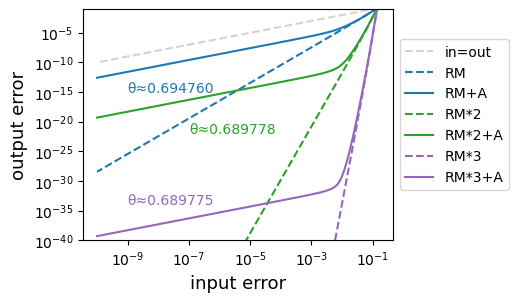

In [3]:

input_error = np.logspace(-.8, -10, 10000)
plt.figure(figsize=(4,3))
# plt.subplot(1,2,1)
# plt.plot(input_error, output_error)
# plt.plot(input_error, input_error,'--')

# plt.xlabel('input error rate')
plt.subplot(1,1,1)
plt.loglog(input_error, input_error,'--',color='lightgrey',label='in=out')
plt.loglog(input_error, get_output_error(input_error, 'B'),'--',label='RM',color='C0')
plt.loglog(input_error, get_output_error(input_error, 'BA'),label='RM+A',color='C0')
plt.loglog(input_error, get_output_error(input_error, 'BB'),'--',label='RM*2',color='C2')
plt.loglog(input_error, get_output_error(input_error, 'BBA'),label='RM*2+A',color='C2')
plt.loglog(input_error, get_output_error(input_error, 'BBB'),'--',label='RM*3',color='C4')
plt.loglog(input_error, get_output_error(input_error, 'BBBA'),label='RM*3+A',color='C4')

plt.text(1e-9,1e-15,'θ≈0.694760',color='C0')
plt.text(1e-7,1e-22,'θ≈0.689778',color='C2')
plt.text(1e-9,1e-34,'θ≈0.689775',color='C4')

plt.ylim([1e-40,1e-1])
plt.xlabel('input error',fontsize=13)
plt.ylabel('output error',fontsize=13)
plt.legend(bbox_to_anchor=(1, 0.9))

/var/folders/8s/46j41bsj6rq3xkzplbcmjm2h0000gn/T/ipykernel_64180/3232883481.py:13: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,1e7])


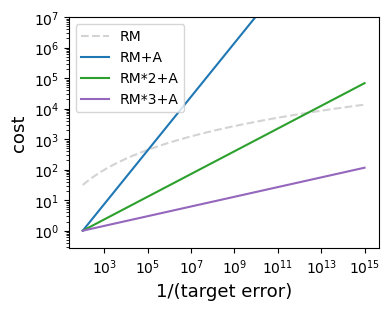

In [4]:
e = np.logspace(-2, -15, 1000)

N = (0.01/e)**0.372
N_15RM = 10.2 * np.log10(1/e) * (0.36 * np.log10(10.2/e * np.log10(1/e)))**2.46

plt.subplots(figsize=(4,3))
plt.loglog(1/e,N_15RM,'--', label='RM',color='lightgrey')
plt.loglog(1/e,(0.01/e)**0.879,label='RM+A',color='C0')
plt.loglog(1/e,N,label='RM*2+A',color='C2')
plt.loglog(1/e,(0.01/e)**0.1588,label='RM*3+A',color='C4')
plt.xlabel('1/(target error)',fontsize=13)
plt.ylabel('cost',fontsize=13)
plt.ylim([0,1e7])
plt.legend()